
## Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
df = pd.read_csv('application_data.csv')

### Data

In [17]:
print(df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

## Columns

In [18]:
print(df.columns.to_list())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

# Exploratory Data Analysis

### Missing Values
#### White lines indicate missing values.

AxesSubplot(0.125,0.125;0.698618x0.755)


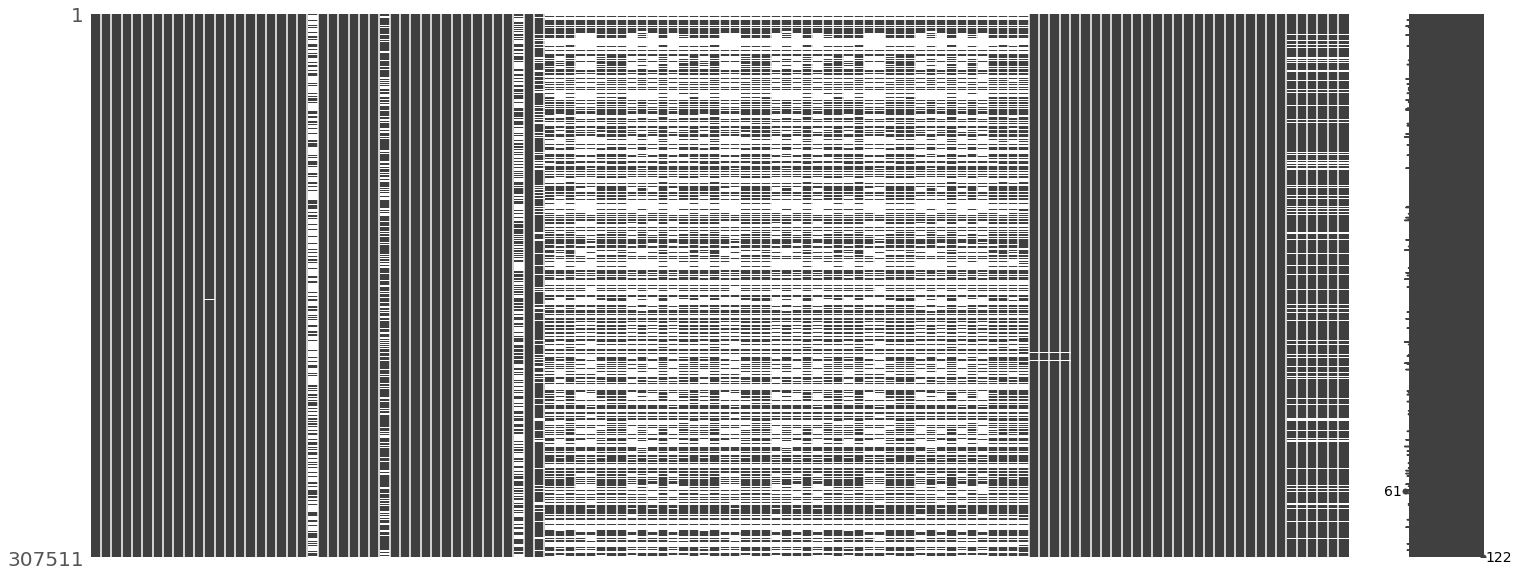

In [19]:
print(msno.matrix(df))

### Default Summary

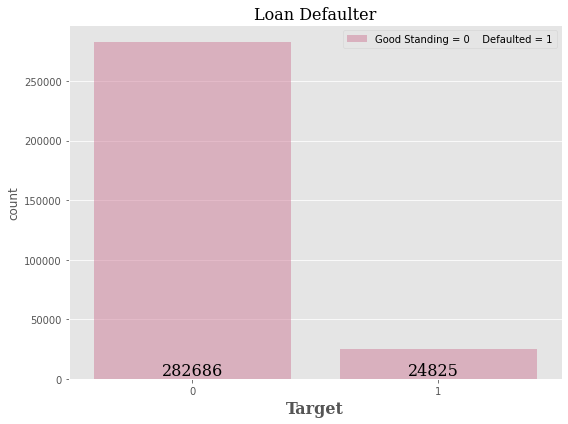

Target Summary: 
0    282686
1     24825
Name: TARGET, dtype: int64


In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='TARGET', data=df, color="palevioletred", alpha=0.5)
plt.xlabel('Target', fontsize=16, fontfamily='serif', fontweight='bold')
plt.legend(['Good Standing = 0'
           '    Defaulted = 1'])
text_1 = '282686'
text_2 = '24825'
plt.text(0.0,0.0, text_1, horizontalalignment='center', verticalalignment='bottom',fontsize=16, fontfamily='serif')
plt.text(0.98,-550.0, text_2, horizontalalignment='center', verticalalignment='bottom',fontsize=16, fontfamily='serif')
plt.title('Loan Defaulter', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Target Summary: ')
print(df['TARGET'].value_counts())

# Financial Products

### Cash Loans

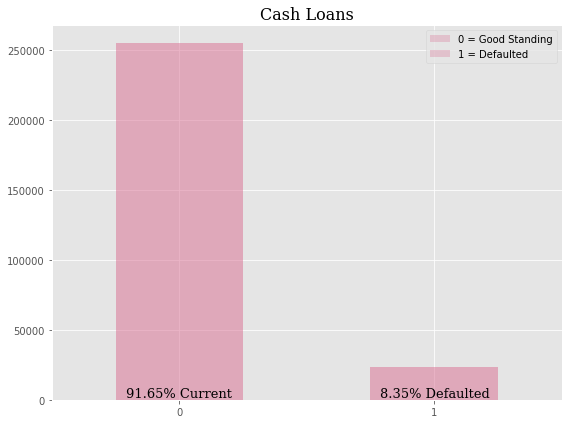

Cash Loans: 
0    255011
1     23221
Name: TARGET, dtype: int64


In [21]:
loan = df['TARGET'].groupby(df['NAME_CONTRACT_TYPE'])

cash = loan.get_group('Cash loans').value_counts()
revolving = loan.get_group('Revolving loans').value_counts()


plt.figure(figsize=(8,6))
cash.plot(kind='bar', label='0 = Good Standing', color='palevioletred',alpha=0.3)
cash.plot(kind='bar', label='1 = Defaulted', color='palevioletred',alpha=0.3)
plt.xticks(rotation=0)
text1='8.35% Defaulted'
text2 = '91.65% Current'
plt.text(.789, -5, text1, fontsize=13, fontfamily='serif', verticalalignment='bottom')
plt.text(-.21, 16.1, text2, fontsize=13, fontfamily='serif', verticalalignment='bottom')
plt.legend()
plt.title('Cash Loans', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Cash Loans: ')
print(cash)

### Revolving Loans

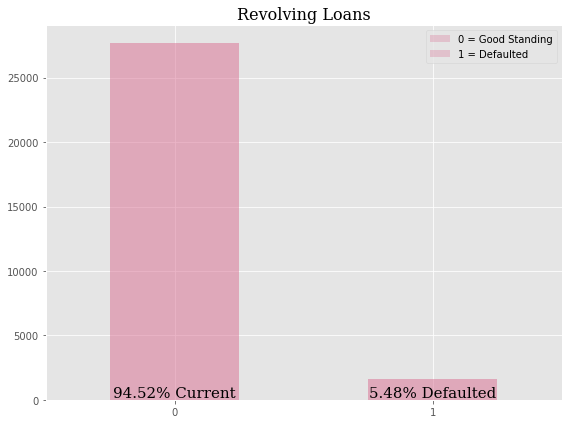

Revolving Loans: 
0    27675
1     1604
Name: TARGET, dtype: int64


In [22]:
plt.figure(figsize=(8,6))
revolving.plot(kind='bar', label='0 = Good Standing', color='palevioletred',alpha=0.3)
revolving.plot(kind='bar', label='1 = Defaulted', color='palevioletred',alpha=0.3)
plt.xticks(rotation=0)
text='5.48% Defaulted'
text_ = '94.52% Current'
plt.text(.752, -5, text, fontsize=15, fontfamily='serif', verticalalignment='bottom')
plt.text(-.241, -5, text_, fontsize=15, fontfamily='serif', verticalalignment='bottom')
plt.legend()
plt.title('Revolving Loans', fontsize=16, fontfamily='serif')
plt.tight_layout()
plt.show()

print('Revolving Loans: ')
print(revolving)

# Consumers

### Total Consumers by Gender

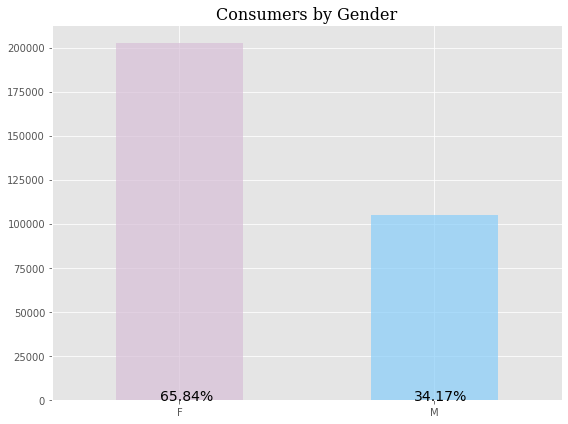

Gender Summary: 
F    202448
M    105059
Name: CODE_GENDER, dtype: int64


In [23]:
#Removing category XNA
df['CODE_GENDER'] = df['CODE_GENDER'].astype('category')
df['CODE_GENDER'] = df['CODE_GENDER'].cat.remove_categories('XNA')

ftxt = '65.84%'
mtxt = '34.17%'
xxtxt = '0%'

plt.figure(figsize=(8,6))
df['CODE_GENDER'].value_counts().plot(kind='bar', color=['thistle', 'lightskyblue'], alpha=0.70)
plt.text(-0.078,0.0, ftxt, fontsize=14)
plt.text(0.920,0.0, mtxt, fontsize=14)
plt.title('Consumers by Gender', fontsize=16, fontfamily='serif')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print('Gender Summary: ')
print(df['CODE_GENDER'].value_counts())

### Default Summary by Gender
#### [ 0 = Good Standing, 1 = Defaulted ]

<Figure size 720x720 with 0 Axes>

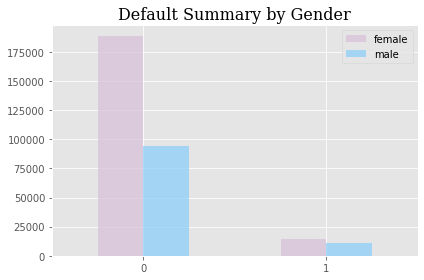

   female   male
0  188278  94404
1   14170  10655


In [32]:
gender = df['TARGET'].groupby(df['CODE_GENDER'])

female_code = gender.get_group('F')
female_code.value_counts()

male_code = gender.get_group('M')
male_code.value_counts()

default_gender = pd.DataFrame()
default_gender['female'] = female_code.value_counts()
default_gender['male'] = male_code.value_counts()

plt.figure(figsize=(10,10))
default_gender.plot(kind='bar', color=['thistle', 'lightskyblue'], alpha=0.7)
plt.title('Default Summary by Gender', fontsize=16, fontfamily='serif')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(default_gender)

### Income Summary by Gender

In [25]:
money = df['AMT_INCOME_TOTAL'].groupby(df['CODE_GENDER'])
female_money = money.get_group('F').describe()

money = df['AMT_INCOME_TOTAL'].groupby(df['CODE_GENDER'])
male_money = money.get_group('M').describe()

df_gender = pd.DataFrame()
df_gender['male_income'] = money.get_group('M').describe()
df_gender['female_income'] = money.get_group('F').describe()

print(df_gender)


        male_income  female_income
count  1.050590e+05   2.024480e+05
mean   1.933965e+05   1.560323e+05
std    1.345972e+05   2.748256e+05
min    2.700000e+04   2.565000e+04
25%    1.350000e+05   9.900000e+04
50%    1.800000e+05   1.350000e+05
75%    2.250000e+05   1.800000e+05
max    1.800009e+07   1.170000e+08
